In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

Obtendo Dados através da API do Banco Central do Brasil

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

Exemplo de Consultas à API do Banco Central do Brasil

In [5]:
ipca = consulta_bc(433)
ipca

,valor
data,
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
1980-06-01,5.31
...,...
2024-09-01,0.44
2024-10-01,0.56
2024-11-01,0.39


In [8]:
igpm = consulta_bc(189)
igpm

,valor
data,
1989-07-01,35.90
1989-08-01,36.92
1989-09-01,39.92
1989-10-01,40.64
1989-11-01,40.48
...,...
2024-09-01,0.62
2024-10-01,1.52
2024-11-01,1.30


<Axes: xlabel='data'>

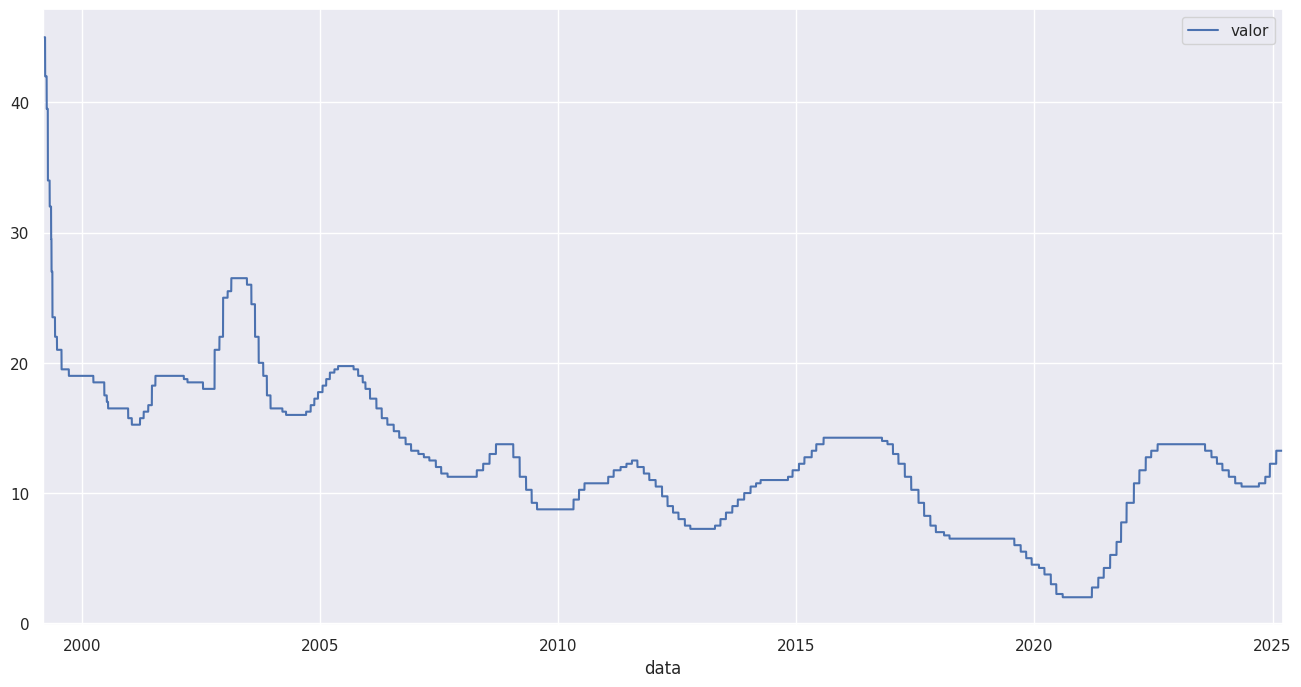

In [9]:
selic_meta = consulta_bc(432)
selic_meta.plot()

In [10]:
reservas_internacionais = consulta_bc(3545)

<Axes: xlabel='data'>

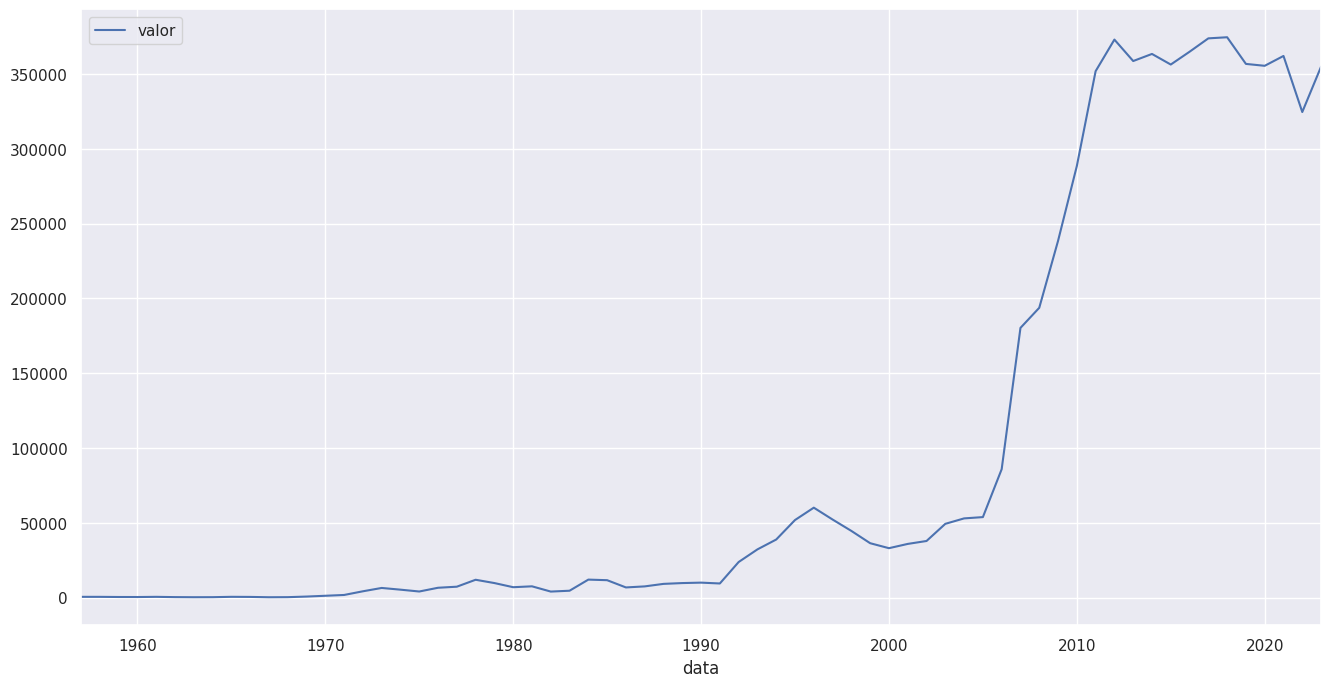

In [11]:
reservas_internacionais.plot()

In [12]:
pnat = consulta_bc(24369)
pnat

,valor
data,
2012-03-01,8.0
2012-04-01,7.8
2012-05-01,7.7
2012-06-01,7.6
2012-07-01,7.5
...,...
2024-08-01,6.6
2024-09-01,6.4
2024-10-01,6.2


In [13]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


Comparação retorno ibovespa X CDI
pode ser feito ipca, ou outras métricas, ajustando o codigo e alguns dados

In [14]:
ibov = yf.download(tickers='^BVSP')[['Close']]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [15]:
ibov_retorno = ibov.pct_change()

In [16]:
data_inicio = '2015-01-01'

In [17]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [19]:
cdi = consulta_bc(12)

In [20]:
cdi_acumulado = (1 + cdi [cdi.index >= data_inicio] / 100).cumprod();
cdi_acumulado.iloc[0] = 1

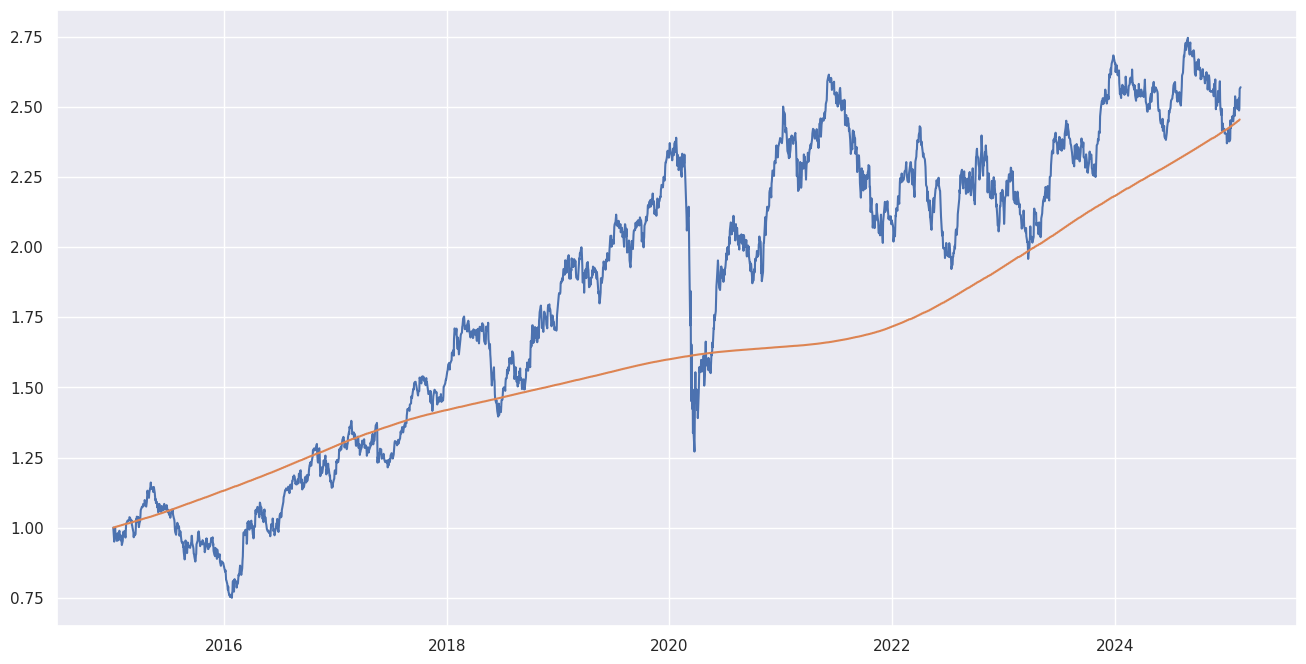

In [21]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);

In [22]:
cdi_acumulado

,valor
data,
2015-01-02,1.000000
2015-01-05,1.000869
2015-01-06,1.001304
2015-01-07,1.001739
2015-01-08,1.002175
...,...
2025-02-10,2.450387
2025-02-11,2.451589
2025-02-12,2.452791


In [23]:
ibov_retorno_acumulado

Price,Close
Ticker,^BVSP
Date,
2015-01-02,1.000000
2015-01-05,0.950207
2015-01-06,0.959886
2015-01-07,0.989122
2015-01-08,0.998720
...,...
2025-02-11,2.530086
2025-02-12,2.487252
